# Data Preprocessing Template

## Importing the libraries

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Importing the dataset

In [47]:
conditions = {
    "calve": "1",
    "knorr": "2",
    "lipton": "3",
    "LİPTON": "3",
    "omo": "4",
    "rinso": "5",  
    "yumos": "6",
    "yumoş": "6",  
    "signal": "7",
    "SİGNAL": "7",
    "white": "7",  
    "şampuan": "8",
    "dove": "9",
    "elidor": "10",
    "ELİDOR": "10",
    "clear": "11",
    "domestos": "12",
    "vim": "13",
    "cif": "14",
    "CİF": "14",
    "yüzey": "15",
    "rexona": "16",
    "axe": "17",
    "lux": "18",  
    "pure": "19",  
    "VASELİNE": "20" 
}

def value_to_condition(value):
    for k, v in conditions.items():
        if str(value) == str(v):
            return k
    return None



In [48]:
dataset = pd.read_excel('../vm_dataset.xlsx')

In [49]:
dataset["MARKA"] = dataset["MAMUL"].apply(value_to_condition)

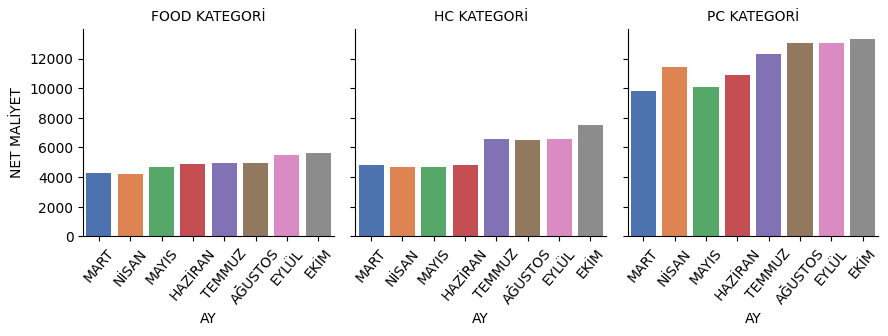

In [50]:
g = sns.FacetGrid(data=dataset, col="KATEGORİ")
g.map(sns.barplot, "AY", "NET MALİYET", hue="AY", data=dataset, order=dataset["AY"].unique(),
      palette="deep", errorbar=None, estimator=np.sum, orient="v", saturation=1,
      legend=False).set_xticklabels(rotation=50).set_titles("{col_name} {col_var}")
plt.show()
# bu grafikte kategorilerin aylara göre net maliyetlerini görebiliriz.


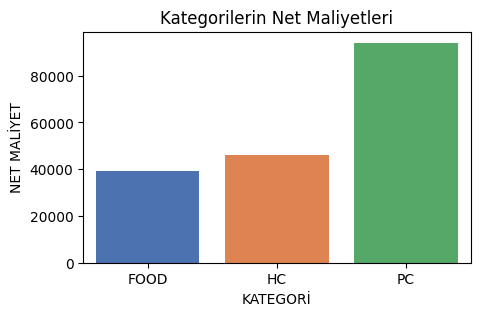

In [51]:
fig = plt.figure(figsize=(5,3))
sns.barplot(x="KATEGORİ", y="NET MALİYET", hue="KATEGORİ", data=dataset, estimator=np.sum, errorbar=None, palette="deep", saturation=1, legend=False)
plt.title("Kategorilerin Net Maliyetleri")
plt.show()
# bu grafikte kategorilerin net maliyetlerini görebiliriz.

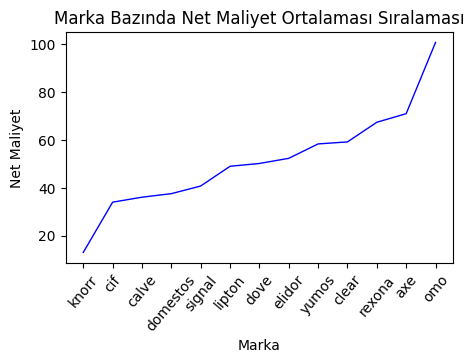

In [52]:
fig = plt.figure(figsize=(5,3))
# net maliyeti ortalamasına göre sırala
ort = dataset.groupby("MARKA")["NET MALİYET"].mean().sort_values(ascending=True)

# plt.bar(x=ort.index, height=ort.values, color="red", width=0.5) # type: ignore
plt.plot(ort.index, ort.values, color="blue", linewidth=1, markersize=5, label="Net Maliyet")
plt.title("Marka Bazında Net Maliyet Ortalaması Sıralaması")
plt.xticks(rotation=50)
plt.xlabel("Marka")
plt.ylabel("Net Maliyet")
plt.show()

# marka bazında net maliyet ortalaması sıralaması

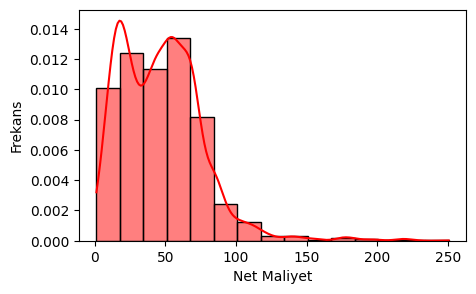

In [53]:
fig = plt.figure(figsize=(5,3))
sns.histplot(dataset["NET MALİYET"], color="red", bins=15, kde=True, stat="density")
plt.xlabel("Net Maliyet")
plt.ylabel("Frekans")
plt.show()
# net maliyet dağılımı grafiği

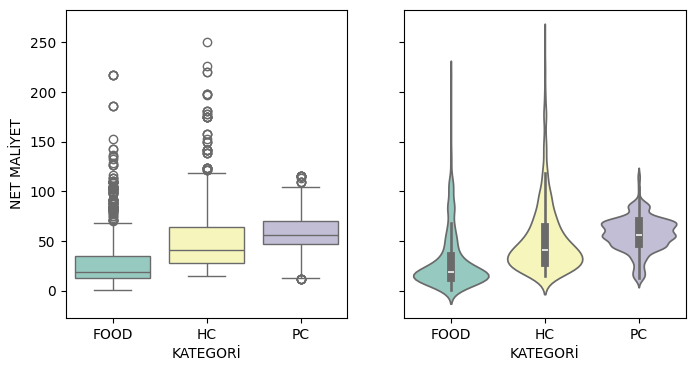

In [54]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100, ncols=2, nrows=1, sharex=True, sharey=True)
sns.boxplot(x=dataset["KATEGORİ"], y=dataset["NET MALİYET"], hue=dataset["KATEGORİ"], palette="Set3", ax=ax[0], legend=False)
sns.violinplot(x=dataset["KATEGORİ"], y=dataset["NET MALİYET"], hue=dataset["KATEGORİ"], palette="Set3", ax=ax[1], legend=False)
plt.show()
# boxplot ile kategorilerin net maliyetlerinin yüzdelik dilimlerini görebiliriz.

<Figure size 1000x300 with 0 Axes>

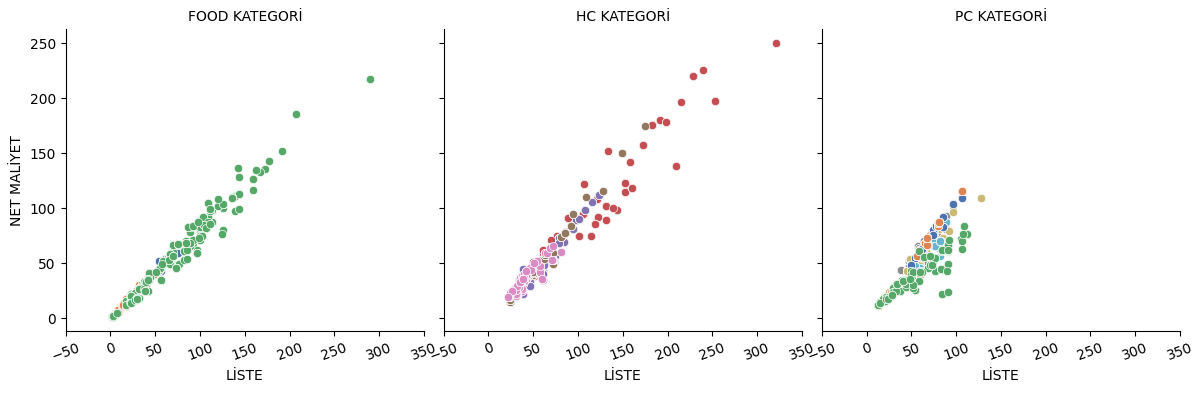

In [55]:
fig = plt.figure(figsize=(10,3))
g = sns.FacetGrid(data=dataset , col="KATEGORİ", hue="MARKA", col_wrap=3, height=4, aspect=1, palette="deep")
g.map(sns.scatterplot, "LİSTE", "NET MALİYET" )
g.set_xticklabels(rotation=20)
g.set_titles("{col_name} {col_var}")
g.fig.subplots_adjust(top=0.9)
plt.show()
# scatterplot ile kategorilerin liste ve net maliyetlerini görselleştirmesi.

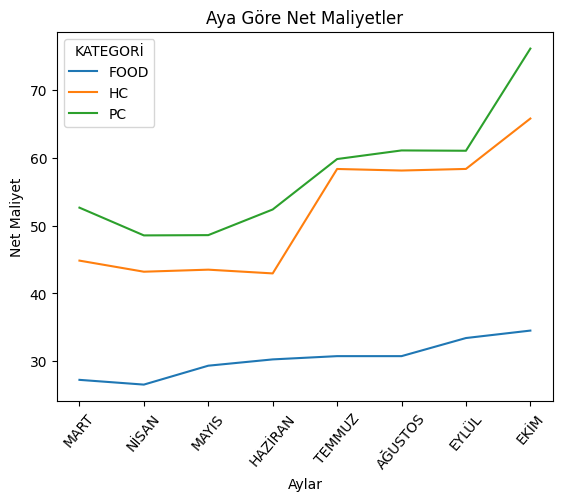

In [56]:
# lineplot 
sns.lineplot(x=dataset["AY"], y=dataset["NET MALİYET"], hue=dataset["KATEGORİ"], errorbar=None)
plt.title("Aya Göre Net Maliyetler")
plt.xlabel("Aylar")
plt.ylabel("Net Maliyet")
plt.xticks(rotation=50)
plt.show()

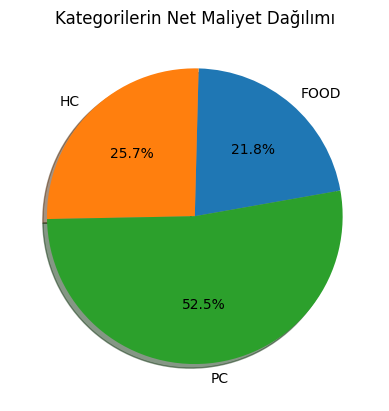

In [57]:
labels = dataset["KATEGORİ"].unique().tolist()
plt.pie(dataset.groupby("KATEGORİ")["NET MALİYET"].sum(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10, textprops={'fontsize': 10})
plt.title("Kategorilerin Net Maliyet Dağılımı")
plt.show()
# labels : kategoriler
# autopct : yüzdelik dilim
# shadow : gölge
# startangle : başlangıç açısı
# textprops : yazı boyutu
# pie chart ile kategorilerin net maliyet dağılımını görebiliriz.

## TAHMİN - GERÇEK VERİ SETİ

In [58]:
comparison_dataset = pd.read_excel("comparison_dataset.xlsx")
comparison_dataset.head() # Tahmin,	Gerçek

,Tahmin,Gerçek
0,51.833789,47.934958
1,38.026856,38.115900
2,35.784874,24.404345
3,47.845657,43.247331
4,21.043368,23.612815


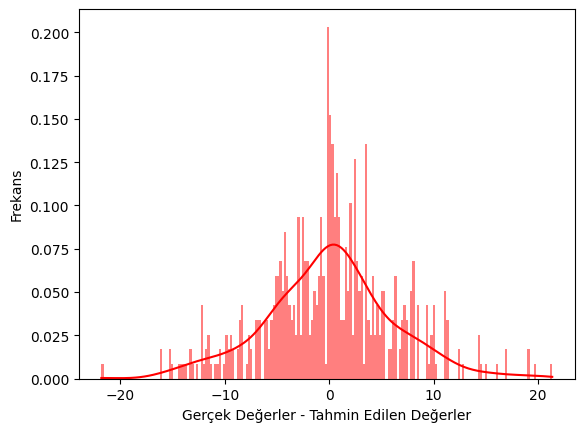

In [59]:
sns.histplot(comparison_dataset["Tahmin"] - comparison_dataset["Gerçek"], bins=200, kde=True, color='red', alpha=0.5, stat='density'
             , label='Tahmin - Gerçek', element='step', fill=True, linewidth=0)
plt.xlabel('Gerçek Değerler - Tahmin Edilen Değerler')
plt.ylabel('Frekans')
# plt.title('Tahmin ve Gerçek Farkı ile Hata Dağılımı')
plt.show()


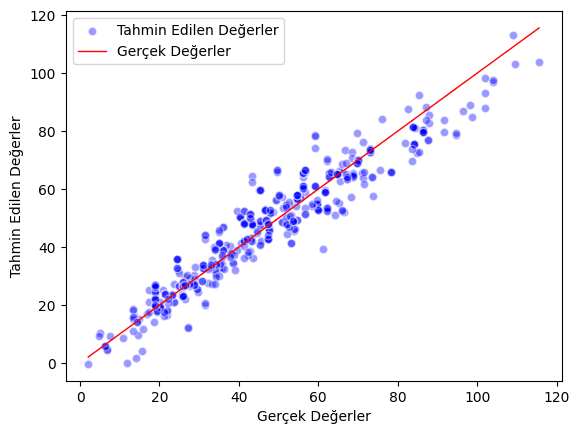

In [60]:
sns.scatterplot(x=comparison_dataset["Gerçek"], y=comparison_dataset["Tahmin"], color='blue', alpha=0.4, label='Tahmin Edilen Değerler', linewidth=1)
sns.lineplot(x=comparison_dataset["Gerçek"], y=comparison_dataset["Gerçek"], color='red', label='Gerçek Değerler', linewidth=1)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
# plt.title('Tahmin ve Gerçek Değerlerin Karşılaştırılması')
plt.show()